In [5]:
from importlib.metadata import version
import cv2
import pixellib
import os
import urllib
import numpy as np
from pixellib.semantic import semantic_segmentation
import matplotlib.pyplot as plt

# 사진 불러오기

In [3]:
# 인물 사진 불러오기
img_human_path = os.getenv('HOME') + '/aiffel/human_segmentation/images/김사항.jpg'
img_human = cv2.imread(img_human_path)
print(img_human.shape)

(675, 540, 3)


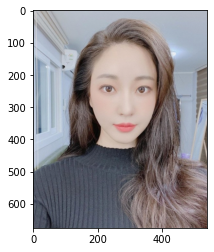

In [6]:
plt.imshow(cv2.cvtColor(img_human, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
# 시내 사진 불러오기
img_city_path = os.getenv('HOME') + '/aiffel/human_segmentation/images/시내.jpg'
img_city = cv2.imread(img_city_path)
print(img_city.shape)

(315, 560, 3)


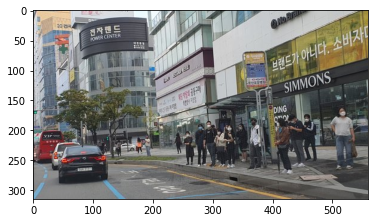

In [8]:
plt.imshow(cv2.cvtColor(img_city, cv2.COLOR_BGR2RGB))
plt.show()

In [58]:
# 개 사진 불러오기
img_dog_path = os.getenv('HOME') + '/aiffel/human_segmentation/images/개.jpeg'
img_dog = cv2.imread(img_dog_path)
print(img_dog.shape)

(407, 630, 3)


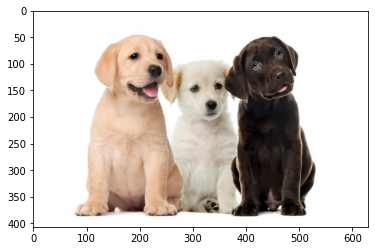

In [59]:
plt.imshow(cv2.cvtColor(img_dog, cv2.COLOR_BGR2RGB))
plt.show()

# 세그멘테이션으로 분리하기

In [11]:
# 모델 다운로드
model_dir = os.getenv('HOME') +'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabc3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabc3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fc5fc10aeb0>)

In [12]:
# 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# 인물 사진 세그멘테이션으로 분류하기 

In [70]:
segvalues, output = model.segmentAsPascalvoc(img_human_path)

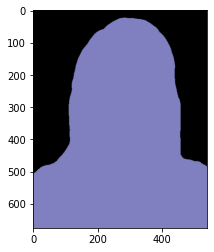

In [71]:
plt.imshow(output)
plt.show()

In [72]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [73]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'monkey', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [74]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [75]:
print(LABEL_NAMES.index("background"))
print(LABEL_NAMES.index("person"))

0
15


In [76]:
colormap = np.zeros((256,3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>=3
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [77]:
colormap[15]

array([192, 128, 128])

In [78]:
seg_color = (128, 128, 192)

(675, 540)


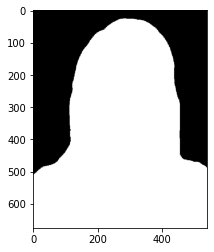

In [79]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

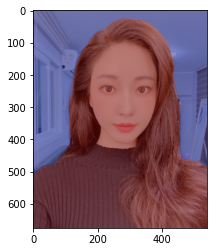

In [80]:
img_show = img_human.copy()
img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

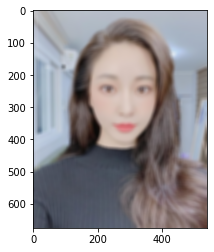

In [81]:
img_orig_blur = cv2.blur(img_human, (13, 13))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

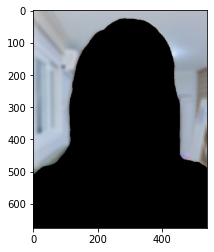

In [82]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

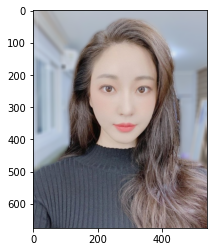

In [84]:
img_concat = np.where(img_mask_color==255, img_human, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 도시 세그멘테이션으로 분류하기

In [85]:
segvalues, output = model.segmentAsPascalvoc(img_city_path)

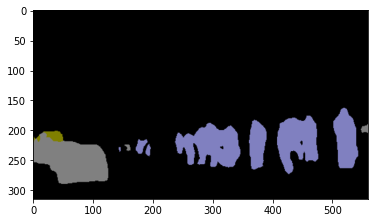

In [86]:
plt.imshow(output)
plt.show()

In [87]:
segvalues

{'class_ids': array([ 0,  6,  7, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [88]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bus
car
person


In [89]:
print(LABEL_NAMES.index('bus'))
print(LABEL_NAMES.index('car'))
print(LABEL_NAMES.index('person'))

6
7
15


In [90]:
print(colormap[6])
print(colormap[7])
print(colormap[15])

[  0 128 128]
[128 128 128]
[192 128 128]


In [91]:
seg_color_bus = (128, 128, 0)
seg_color_car = (128, 128, 128)
seg_color_human = (128, 128, 192)

In [92]:
seg_color = seg_color_bus, seg_color_car, seg_color_human
print(seg_color)

((128, 128, 0), (128, 128, 128), (128, 128, 192))


(315, 560)


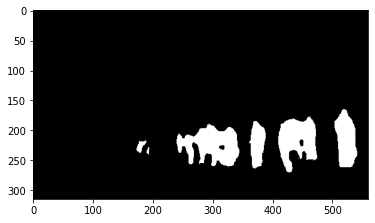

In [93]:
# 차, 버스, 사람과 같이 나오게 하려고 시도하였으나 실패
# seg_map = np.all(output==seg_color, axis=-1)

seg_map = np.all(output==seg_color_human, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

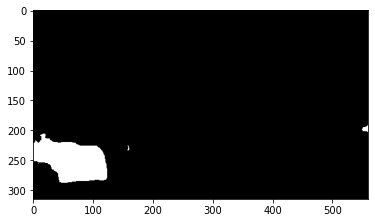

In [94]:
seg_map2 = np.all(output==seg_color_car, axis=-1)
plt.imshow(seg_map2, cmap='gray')
plt.show()

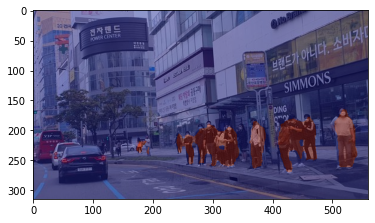

In [95]:
# 자동차와 같이 해보려고 했으나 실패

img_show = img_city.copy()

img_mask = seg_map.astype(np.uint8) * 255
#img_mask2 = seg_map2.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
#color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)#, color_mask2, 0.9,0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

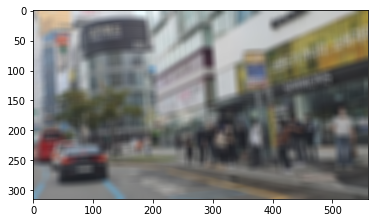

In [97]:
img_city_blur = cv2.blur(img_city, (13,13))
plt.imshow(cv2.cvtColor(img_city_blur, cv2.COLOR_BGR2RGB))
plt.show()

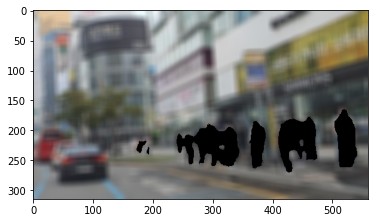

In [99]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_city_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

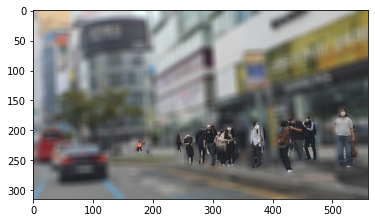

In [101]:
img_concat = np.where(img_mask_color==255, img_city, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 개 세그멘테이션

In [102]:
segvalues, output = model.segmentAsPascalvoc(img_dog_path)

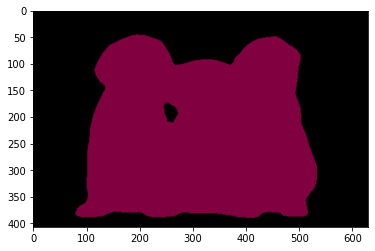

In [103]:
plt.imshow(output)
plt.show()

In [104]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [105]:
print(LABEL_NAMES.index('dog'))

12


In [106]:
colormap[12]

array([ 64,   0, 128])

In [107]:
seg_color = (128, 0, 64)

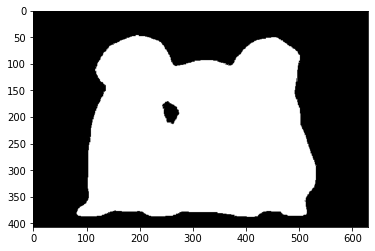

In [108]:
seg_map = np.all(output==seg_color, axis=-1)
plt.imshow(seg_map, cmap='gray')
plt.show()

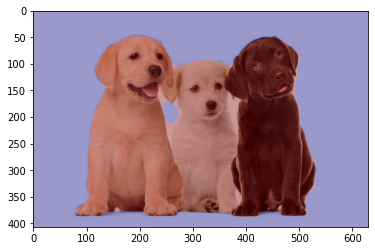

In [109]:
img_show = img_dog.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

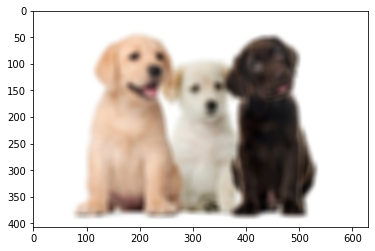

In [110]:
img_dog_blur = cv2.blur(img_dog, (13,13))

plt.imshow(cv2.cvtColor(img_dog_blur, cv2.COLOR_BGR2RGB))
plt.show()

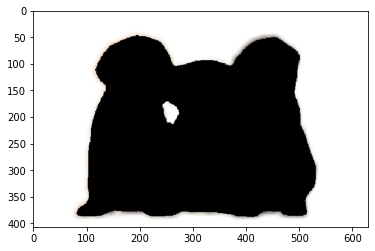

In [111]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_dog_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

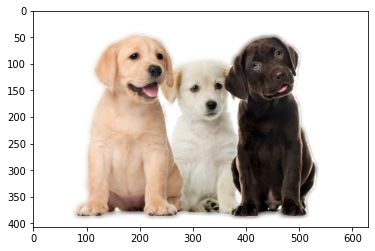

In [112]:
img_concat = np.where(img_mask_color==255, img_dog, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()